In [6]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler


def heat_map(df):
    # independent columns
    X = df.iloc[:, 6:]

    y = df['complex_binary']
    # get correlations of each features in dataset
    corrmat = X.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(20, 20))
    # plot heat map
    sns.heatmap(df[top_corr_features].corr(),
                linewidths=.5, annot=True, fmt='.1f', cmap="RdYlGn")

    plt.show()
##########################################################################################################

# given name of dataframe, returns all correct outputs


def get_correct_words(df):
    correct_df = df.copy()
    correct_df = correct_df[correct_df['output']
                            == correct_df['complex_binary']]
    return df
##########################################################################################################

# given name of dataframe, returns all wrong outputs


def get_wrong_words(df):
    wrong_df = df.copy()
    wrong_df = wrong_df[wrong_df['output'] != wrong_df['complex_binary']]
    return wrong_df

##########################################################################################################

def kde_plot(df, name, x_var):
    scale = StandardScaler().fit(df[[x_var]])
    df[x_var] = scale.transform(df[[x_var]])
    sns.histplot(df, x=x_var, hue="complex_binary", kde=True, element="step")
    plt.title(name)
    plt.show()

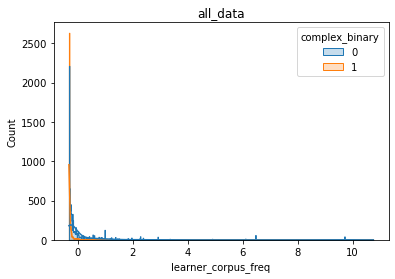

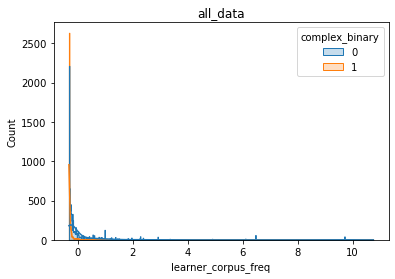

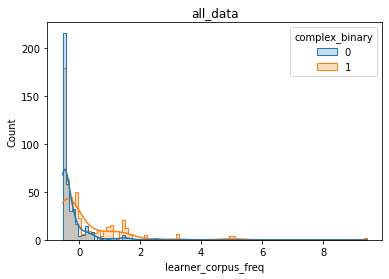

In [9]:
data_name = "all_feats_ada/news_all_feats_ada_train_results"
x_var = 'learner_corpus_freq'


df = pd.read_csv("results/" + data_name + ".csv")
correct_df = get_correct_words(df)
wrong_df = get_wrong_words(df)
df_list = [df, correct_df, wrong_df]

name = ["all_data", "correct_outputs", "wrong_outputs"]
i = 0
for df in df_list:
    kde_plot(df, name[i], x_var)
